In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers

2024-10-25 01:45:26.873656: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-25 01:45:27.810117: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
data = pd.read_csv('processed_data.csv')

tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(data['text'])

X_sequences = tokenizer.texts_to_sequences(data['text'])
X_padded = tf.keras.preprocessing.sequence.pad_sequences(X_sequences, padding='post')

y = data['target'].astype(float).values.reshape(-1, 1)

In [3]:
X_train, X_temp, y_train, y_temp = train_test_split(X_padded, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')

Shape of X_train: (5315, 21)
Shape of y_train: (5315, 1)


In [4]:
model = tf.keras.Sequential([
    layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=X_train.shape[1]),  # Embedding layer
    layers.LSTM(64, return_sequences=True),
    layers.Dropout(0.2),
    layers.LSTM(64),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

learning_rate = 0.00001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/home/theotteryears/miniconda3/envs/tf/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2024-10-25 01:45:29.604593: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-25 01:45:29.663986: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-25 01:45:29.664078: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-25 01:45:29.668864: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not ope

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.000001)

history = model.fit(
    X_train, y_train,
    epochs=500,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/500


2024-10-25 01:45:34.224463: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5510 - loss: 0.6922 - val_accuracy: 0.5733 - val_loss: 0.6897 - learning_rate: 1.0000e-05
Epoch 2/500
167/167 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.5733 - loss: 0.6889 - val_accuracy: 0.5733 - val_loss: 0.6871 - learning_rate: 1.0000e-05
Epoch 3/500
167/167 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.5818 - loss: 0.6852 - val_accuracy: 0.5733 - val_loss: 0.6848 - learning_rate: 1.0000e-05
Epoch 4/500
167/167 ━━━━━━━━━━━━━━━━━━━━ 17s 101ms/step - accuracy: 0.5645 - loss: 0.6850 - val_accuracy: 0.5733 - val_loss: 0.6830 - learning_rate: 1.0000e-05
Epoch 5/500
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.5648 - loss: 0.6841 - val_accuracy: 0.5733 - val_loss: 0.6818 - learning_rate: 1.0000e-05
Epoch 6/500
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.5695 - loss: 0.6820 - val_accuracy: 0.5733 - val_loss: 0.6809 - learning_rate: 1.0000e-05
Epoch 7/500
167/167 ━━━━━━━━━━━━━━━━━━━━ -6s -38860us/step - a

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7875 - loss: 0.4945
Test Loss: 0.49554726481437683, Test Accuracy: 0.7822651267051697


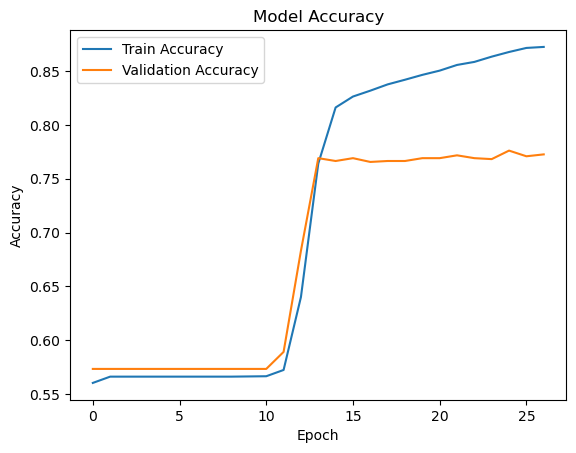

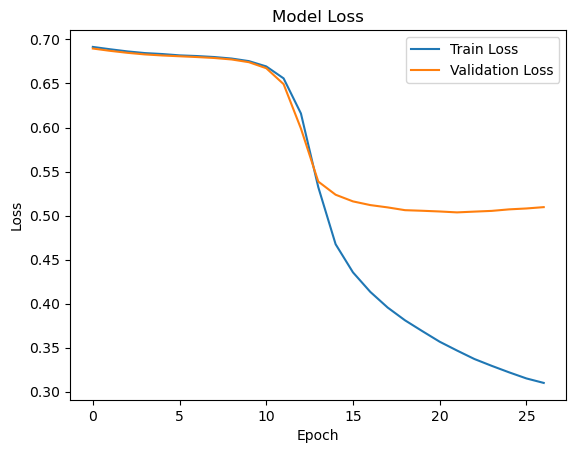

In [6]:
from matplotlib import pyplot as plt


loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [7]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = (model.predict(X_test) > 0.5).astype("int32")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.82      0.81       666
         1.0       0.74      0.74      0.74       473

    accuracy                           0.78      1139
   macro avg       0.78      0.78      0.78      1139
weighted avg       0.78      0.78      0.78      1139


Confusion Matrix:
[[543 123]
 [125 348]]


In [8]:
model.save("embedded.keras")